<a href="https://colab.research.google.com/github/epereirasg/Curso-de-Machine-Learning/blob/main/ProyectoFinal%20ML/%20Entrega%2003%20-%20Explore/%20Entrega_03_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [2]:
import tensorflow as tf
import pandas as pd  #Leer y escribir datos en diferentes formatos
from google.colab import drive #conecta Drive con Colab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split # divide conjuntos de entrenamiento y validaciones
from sklearn.preprocessing import StandardScaler # preprocesamiento de datos, en particular estandarizacion de datos.

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [3]:
from google.colab import drive
drive = drive.mount("/content/drive")
#Debe tenerse en cuenta que con on_bad_lines='skip',salta las líneas malas sin levantar o avisar cuando se encuentran
dataset = pd.read_table("/content/drive/MyDrive/BasedeDatos/WISDM_ar_v1.1_raw.txt",  header=None, sep=',',on_bad_lines='skip')
dataset.head(5)

Mounted at /content/drive


,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


#notna

El método DataFrame.notna() devuelve un objeto booleano con el mismo número de filas y columnas que el DataFrame original. Si un elemento no es NaN, se asigna al valor True en el objeto booleano, y si un elemento es un NaN, se asigna al valor False.

In [4]:
dataset.info()
dataset.notna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086466 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1086466 non-null  int64  
 1   1       1086466 non-null  object 
 2   2       1086466 non-null  int64  
 3   3       1086466 non-null  float64
 4   4       1086466 non-null  float64
 5   5       1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.7+ MB


,0,1,2,3,4,5
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1086461,True,True,True,True,True,True
1086462,True,True,True,True,True,True
1086463,True,True,True,True,True,True
1086464,True,True,True,True,True,True


#DataFrame.dropna()
Pandas elimina las filas con valores NaN para todas las columnas utilizando el método DataFrame.dropna()

In [5]:
dataset.dropna()


,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [6]:
dataset.columns = ['user', 'activity', 'time', 'x', 'y', 'z'] #Los nombres de las columnas de un DataFrame se pueden asignar mediante la propiedad columns.
#dataset.set_axis(['user', 'activity', 'time', 'x', 'y', 'z'], axis=1) #El método set_axis() de los DataFrame de Pandas permite modificar el nombre de los índices tanto de las filas como las columnas. 

Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [7]:
dataset.head(5)

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Buscar datos nulos y eliminarlos si es que existen

In [8]:
# Controlando valores nulos, devuelve true si existen valores nulos
dataset.isnull().any().any()


True

El método nos devuelve el valor "True", lo que indica que existen valores nulos en nuestro dataset. Estos valores pueden tener una influencia significativa en nuestro modelo predictivo, por lo que siempre es una decisión importante determinar la forma en que los vamos a manejar. Las alternativas que tenemos son:

1.Dejarlos como están, lo que a la larga nos va a traer bastantes dolores de cabeza ya que en general los algoritmos no los suelen procesar correctamente y provocan errores.

2.Eliminarlos, lo que es una alternativa viable aunque, dependiendo la cantidad de valores nulos, puede afectar significativamente el resultado final de nuestro modelo predictivo. Es la técnica que seguiremnos en este caso, pues fue lo sugereido.

Se podia además:

3.Inferir su valor. En este caso, lo que podemos hacer es tratar de inferir el valor faltante y reemplazarlo por el valor inferido. Esta suele ser generalmente la mejor alternativa a seguir.

Existen valores ausentes, identificados como NaN. En este caso tenemos datos del tipo categóricos y datos numéricos, podiamos inferir los valores faltantes utilizando la media aritmética para los datos cuantitativos y la moda para los datos categóricos.


In [9]:
# Agrupando columnas por tipo de datos
tipos = dataset.columns.to_series().groupby(dataset.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos.

1

In [10]:
# Armando lista de columnas numéricas
columnas = dataset.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

5

In [11]:
dataset.isnull().any().sum() # conocer la suma de los valores nulos

1

In [12]:
dataset.dropna(inplace=True) #Eliminarlos, lo que es una alternativa viable aunque, dependiendo la cantidad de valores nulos, puede afectar significativamente el resultado final de nuestro modelo predictivo. Es la técnica
dataset.isnull().any().sum()




0

Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1086465 non-null  int64  
 1   activity  1086465 non-null  object 
 2   time      1086465 non-null  int64  
 3   x         1086465 non-null  float64
 4   y         1086465 non-null  float64
 5   z         1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.0+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [14]:
#dataset['x'] = dataset['x'].astype(float, errors = 'raise') #astype() En pandas proporcionan el método astype() para convertir una columna a un tipo específico. Pasamos float al método y ponemos el parámetro errors como 'raise', lo que significa que elevará las excepciones para los valores inválidos. 
#dataset['y'] = dataset['y'].astype(float, errors = 'raise')
#dataset['z'] = dataset['z'].astype(float, errors = 'raise')
# conversión del tipo de objeto a flotante usando to_numeric()
dataset['x'] = pd.to_numeric(dataset['x'],errors = 'coerce') 
dataset['y'] = pd.to_numeric(dataset['y'],errors = 'coerce')
dataset['z'] = pd.to_numeric(dataset['z'],errors = 'coerce')

Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [15]:
dataset.info()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1086465 non-null  int64  
 1   activity  1086465 non-null  object 
 2   time      1086465 non-null  int64  
 3   x         1086465 non-null  float64
 4   y         1086465 non-null  float64
 5   z         1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.0+ MB


,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


#drop
El método drop también se puede utilizar para eliminar más de una columna. Lo que se puede conseguir al indicar como argumento una lista con más de un nombre.

In [16]:
dataset1=dataset.drop(['user', 'time'], axis=1)
dataset1.head(5)


,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [17]:
dataset1['activity'].value_counts()


Walking       418393
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
Name: activity, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [18]:
lista=dataset1['activity'].value_counts() # el menor valor de instancias en la variable nombrada menor
menor=min(lista)
print(menor)
 # acotar por el menor valor detectado en la variable menor 
 # recorrer el datafreme y asignar el valor
#for i in lista.index: 
    #lista[i]=menor  

dataset1=dataset1.groupby('activity').head(menor).iloc[0:menor*6]




48394


Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [19]:
print(dataset1.shape)

(290364, 4)


Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [20]:
dataset1['activity'].value_counts()

Jogging       48394
Walking       48394
Upstairs      48394
Downstairs    48394
Sitting       48394
Standing      48394
Name: activity, dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [21]:
dataset1.head(5)

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [22]:
# split dataset
X = dataset1.iloc[:, 1:4] ## X corresponde a las variables independientes
yresult = dataset1.iloc[:, 0] ## y se usa para denotar la variable objetivo o Target
X.head(5)

,x,y,z
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164


Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, yresult, random_state=0, test_size=0.2)
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X.head(5)

,x,y,z
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164


Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [24]:
datanew=pd.concat([X, yresult], axis=1)
datanew.head()

,x,y,z,activity
0,-0.694638,12.680544,0.503953,Jogging
1,5.012288,11.264028,0.953424,Jogging
2,4.903325,10.882658,-0.081722,Jogging
3,-0.612916,18.496431,3.023717,Jogging
4,-1.184970,12.108489,7.205164,Jogging


###Entrega 03 - EXPLORE

En esta etapa se comprueban desequilibrios en los datos:
Funcionalidades Básicas que nos ofrece la librería de Pandas, lo primero que podríamos hacer en esta etápa de exploración es verificar las características de nuestros datos

In [44]:
print('Cantidad de Filas y columnas:',datanew.shape)
print('Nombre columnas:', datanew.columns)
datanew.info()
datanew.describe()

Cantidad de Filas y columnas: (290364, 4)
Nombre columnas: Index(['x', 'y', 'z', 'activity'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290364 entries, 0 to 1083931
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   x         290364 non-null  float64
 1   y         290364 non-null  float64
 2   z         290364 non-null  float64
 3   activity  290364 non-null  object 
dtypes: float64(3), object(1)
memory usage: 11.1+ MB


,x,y,z
count,290364.000000,290364.000000,290364.000000
mean,1.025955,7.582151,1.636428
std,5.261530,5.542769,4.336866
min,-19.610000,-19.610000,-18.918663
25%,-1.840000,3.790000,-0.912563
50%,0.000000,8.390000,1.116869
75%,3.790000,10.230000,4.018002
max,19.570000,19.572440,19.150210


Podemos verificamos si hay correlación entre los datos, se observa una baja correlación

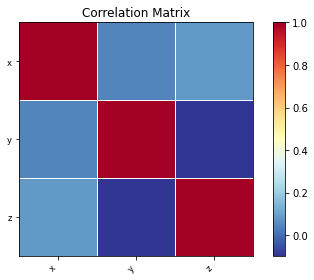

In [67]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
columnas=[list(datanew.columns)[0], list(datanew.columns)[1], list(datanew.columns)[2]]
#plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sm.graphics.plot_corr(datanew.corr(), xnames=columnas)
plt.show()

Podemos realizar un histograma por actividad

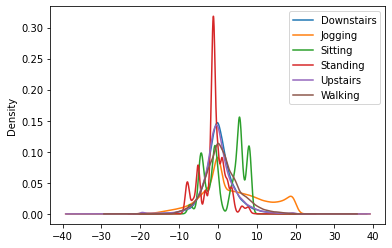

In [93]:
ax = datanew.groupby('activity')['x'].plot(kind='kde', legend = True)


In [ ]:
ax = datanew.groupby('activity')['y'].value_counts().plot(kind='bar')